# Import the needed libraries 

In [1410]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# Import the csv dataset 

In [1411]:
dataset=pd.read_csv("laptop_data.csv")

# Preprocessing 

In [1412]:
# Looking at the top rows of the dataset
dataset.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [1413]:
# The shape of our data
dataset.shape

(1303, 12)

In [1414]:
# Some basic info about the data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [1415]:
# Check for null values 
dataset.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [1416]:
# Check for duplicated values
dataset.duplicated().sum()

0

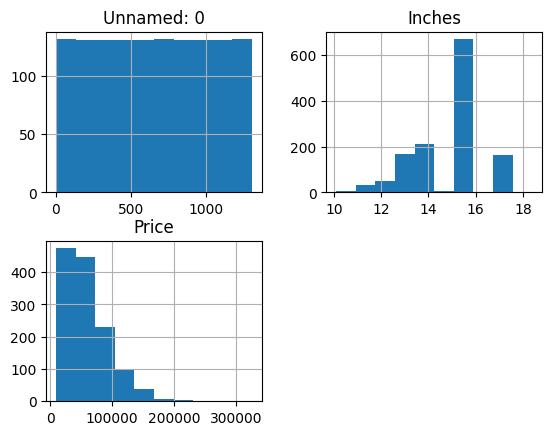

In [1417]:
# plot graphs 
dataset.hist()
plt.show()

In [1418]:
# Look at the company column
dataset['Company'].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

In [1419]:
# Transform the less used company name to others
def company_others(x):
    if x!='Dell' and x!="Lenovo" and x!='HP' and x!="Asus" and x!="Acer" and x!='MSI' and x!='Toshiba' and x!='Apple':
        return 'others'
    else:
        return x
dataset['Company']=dataset['Company'].apply(company_others) 

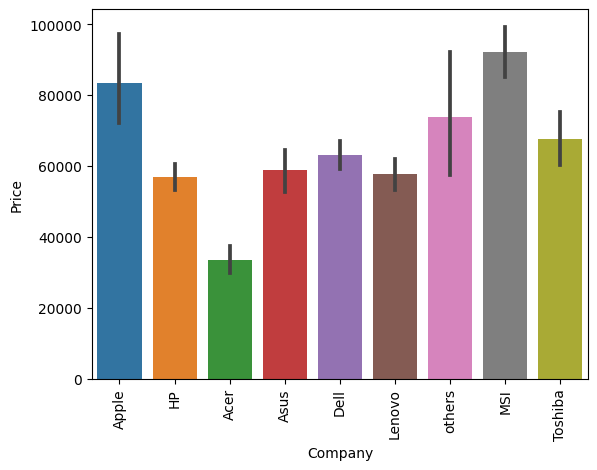

In [1420]:
# Plot a graph against Price and Company
sns.barplot(x='Company',y='Price',data=dataset)
plt.xticks(rotation=90)
plt.show()

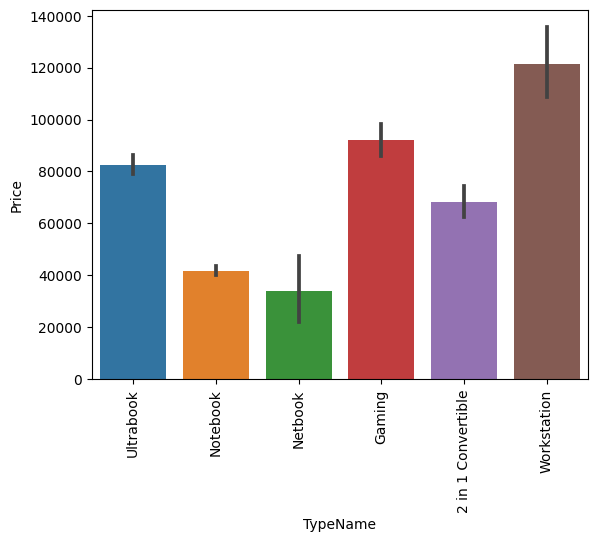

In [1421]:
# Plot a graph against Price and TypeName
sns.barplot(x='TypeName',y='Price',data=dataset)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Inches', ylabel='Price'>

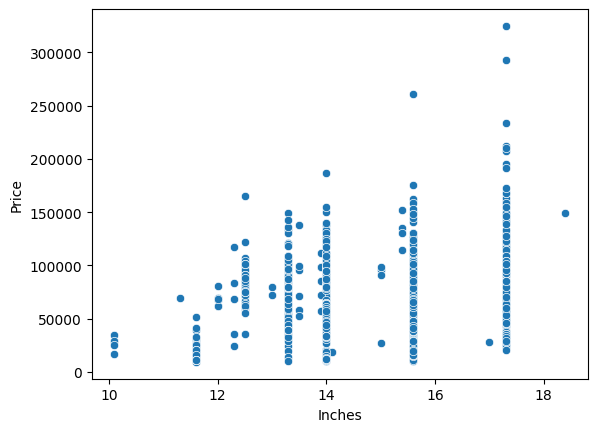

In [1422]:
# Let talk about the Inches column
sns.scatterplot(x='Inches',y='Price',data=dataset)

# Extract Features from ScreenResolution Column 

In [1423]:
dataset['ScreenResolution'].unique() #Lets look at all the unique values 

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [1424]:
# Lets extract the X and Y resolution seperately
dataset['Y_res']=dataset['ScreenResolution'].str.split('x').str[1]

<Axes: xlabel='Y_res', ylabel='Price'>

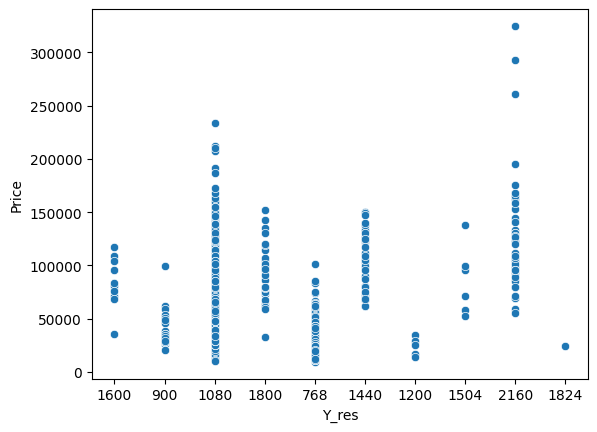

In [1425]:
# Compare Y_res with price 
sns.scatterplot(x='Y_res',y='Price',data=dataset)

In [1426]:
dataset['X_res']=dataset['ScreenResolution'].str.split().str[-1].str.split('x').str[0]

In [1427]:
dataset['X_res']=dataset['X_res'].astype("int32")
dataset['Y_res']=dataset['Y_res'].astype("int32") 

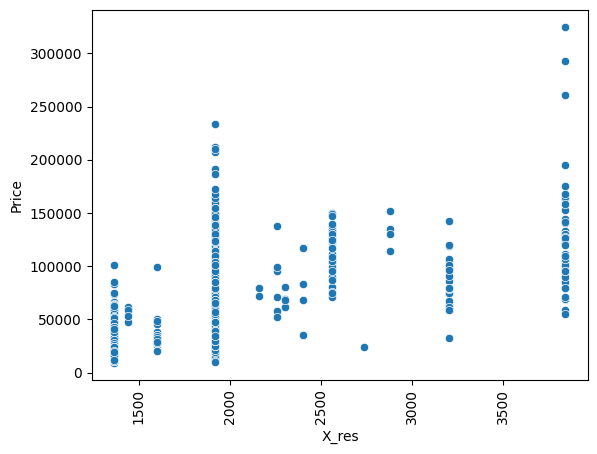

In [1428]:
# Compare X_res with price 
sns.scatterplot(x='X_res',y='Price',data=dataset)
plt.xticks(rotation=90)
plt.show()

In [1429]:
# Lets look at the update
dataset.sample(5)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Y_res,X_res
615,615,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,3kg,62231.04,1080,1920
101,101,HP,Notebook,15.6,Full HD 1920x1080,AMD E-Series E2-9000e 1.5GHz,4GB,500GB HDD,AMD Radeon R2,Windows 10,2.1kg,18594.72,1080,1920
232,232,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,3.2kg,79866.72,1080,1920
422,422,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7820HQ 2.9GHz,8GB,256GB SSD,Intel HD Graphics 630,Windows 10,2.31kg,76030.56,1080,1920
873,873,Lenovo,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,4GB,180GB SSD,Intel HD Graphics 620,Windows 10,1.44kg,39160.80,1080,1920


In [1430]:
# Make an another column for Touchscreen feature 
dataset['Touchscreen']=dataset['ScreenResolution'].apply(lambda x:1 if "Touchscreen" in x else 0)

<Axes: >

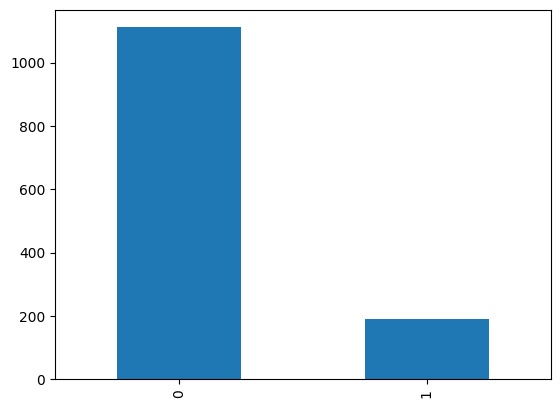

In [1431]:
# Look at the Touchscreen column
dataset['Touchscreen'].value_counts().plot(kind='bar')

<Axes: xlabel='Touchscreen', ylabel='Price'>

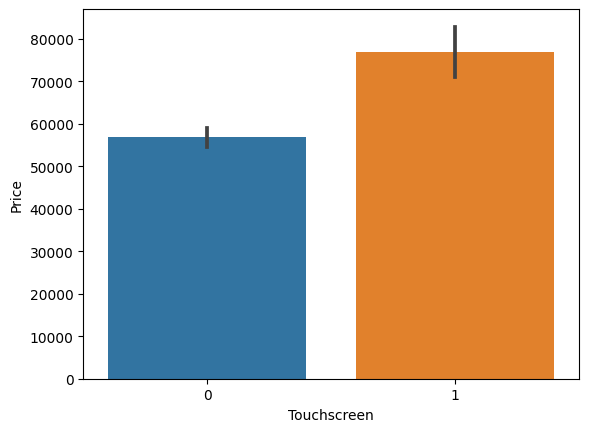

In [1432]:
# Touchscreen VS Price 
sns.barplot(x="Touchscreen",y="Price",data=dataset)

In [1433]:
# Make an another column for IPS Panel feature 
dataset['Ips']=dataset['ScreenResolution'].apply(lambda x:1 if "IPS Panel" in x else 0)

<Axes: >

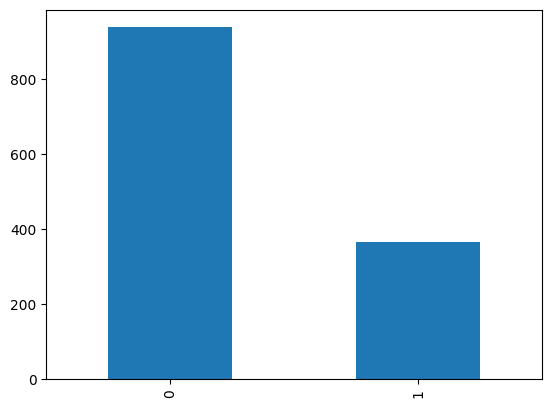

In [1434]:
# Look at the Ips column
dataset['Ips'].value_counts().plot(kind='bar')

<Axes: xlabel='Ips', ylabel='Price'>

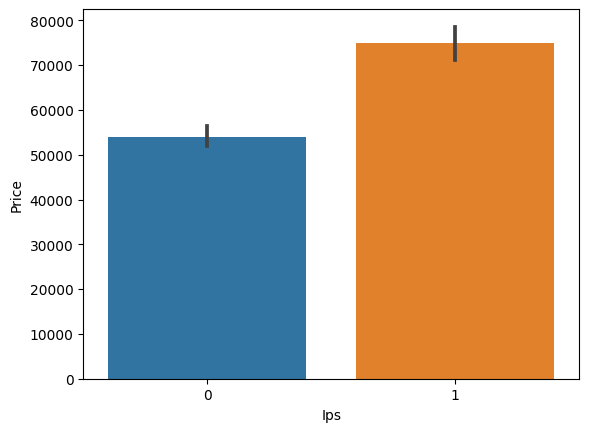

In [1435]:
# IPS panel VS Price 
sns.barplot(x="Ips",y="Price",data=dataset)

In [1436]:
# Make an another column for Resolution type

def resolution_type(x): # A function to extract the resolution type
    if "Quad HD+" in x:
        return "Quad HD+"
    elif "4K Ultra HD" in x:
        return "4K Ultra HD"
    elif "Full HD" in x:
        return "Full HD"
    else:
        return "others"

In [1437]:
# Apply the function to the ScreenResolution
dataset['Resolution_Type']=dataset['ScreenResolution'].apply(resolution_type)

<Axes: >

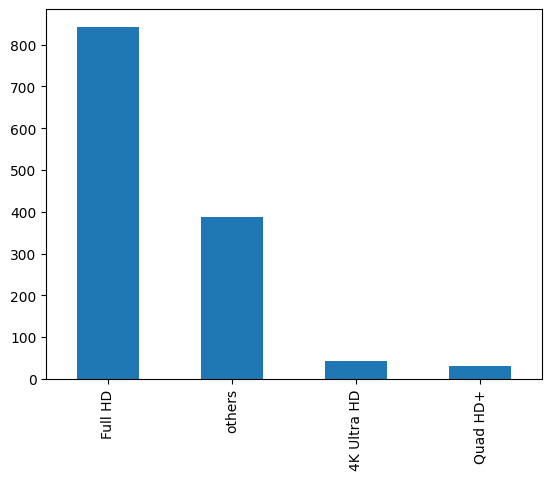

In [1438]:
# Look at the Resolution Type column
dataset['Resolution_Type'].value_counts().plot(kind='bar')

<Axes: xlabel='Resolution_Type', ylabel='Price'>

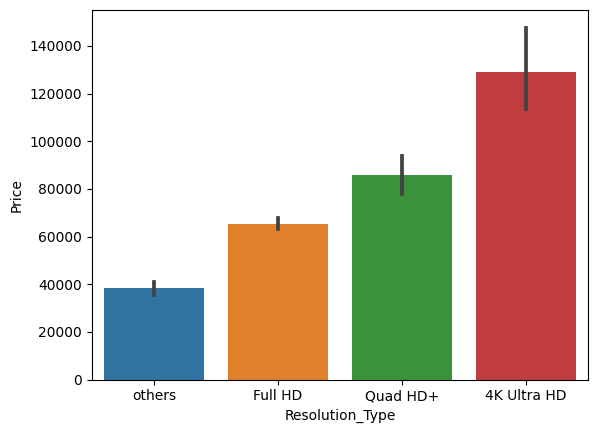

In [1439]:
# Plot a graph against Resolution Type and Price
sns.barplot(x="Resolution_Type",y="Price",data=dataset)

In [1440]:
# An another column for PPI (Pixel Per Inch)
dataset['PPI']=((dataset['X_res']**2)+(dataset['Y_res']**2)**0.5)/dataset['Inches']

In [1441]:
# Now We are done with the ScreeResolution column, lets do the last thing

dataset.head() # Look at the updataes

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Y_res,X_res,Touchscreen,Ips,Resolution_Type,PPI
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,1600,2560,0,1,others,492872.180451
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,900,1440,0,0,others,155977.443609
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1080,1920,0,0,Full HD,236376.923077
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,1800,2880,0,1,others,538714.285714
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,1600,2560,0,1,others,492872.180451


C:\Users\devan\AppData\Local\Temp\ipykernel_1472\503206515.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr())


<Axes: >

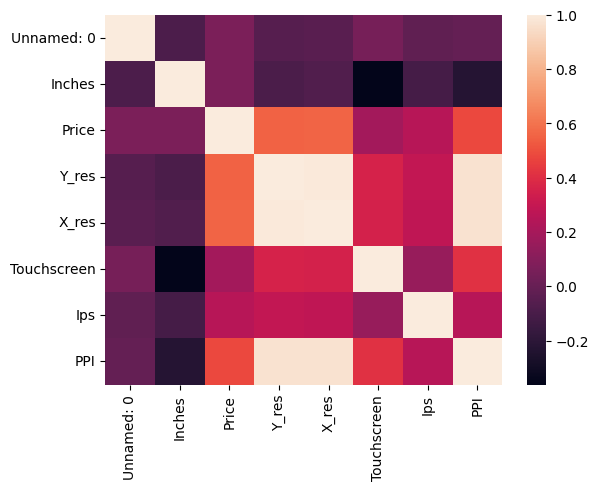

In [1442]:
# Lets look at the relationship between with columns
sns.heatmap(dataset.corr())

In [1443]:
dataset.corr()['Price']

C:\Users\devan\AppData\Local\Temp\ipykernel_1472\3781812157.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()['Price']


Unnamed: 0     0.067984
Inches         0.068197
Price          1.000000
Y_res          0.552809
X_res          0.556529
Touchscreen    0.191226
Ips            0.252208
PPI            0.480376
Name: Price, dtype: float64

In [1444]:
# Lets make an another column for ScreenResolution Ratio
dataset['ScreenResolution_Ratio']=dataset['ScreenResolution'].str.split().str[-1]

<Axes: >

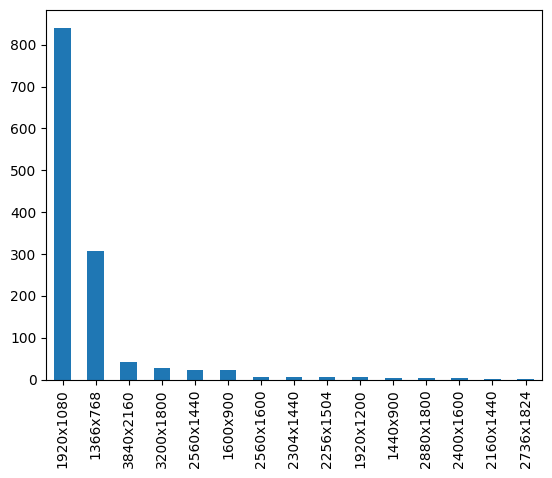

In [1445]:
# Look at the Resolution Ratio column
dataset['ScreenResolution_Ratio'].value_counts().plot(kind='bar')

In [1446]:
# Lets take only most frequent resolutin ratios
def frequent_resolution(x):
    if x!="1920x1080" and x!="1366x768" and x!="3840x2160" and x!='3200x1800' and x!="2560x1440":
        return "others"
    else: 
        return x 

In [1447]:
# Apply the function to ScreenResotion Ratio column
dataset['ScreenResolution_Ratio']=dataset['ScreenResolution_Ratio'].apply(frequent_resolution)

<Axes: xlabel='ScreenResolution_Ratio', ylabel='Price'>

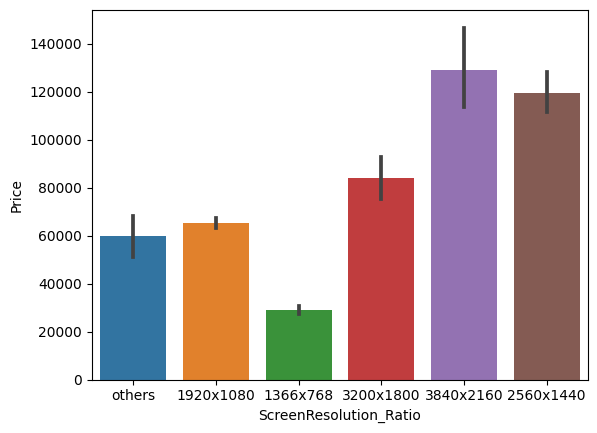

In [1448]:
# Plot a graph against Resolution Type and Price
sns.barplot(x="ScreenResolution_Ratio",y="Price",data=dataset)

In [1449]:
# Remove the unwanted columns till now

dataset.columns  # Look at the columns 

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price', 'Y_res',
       'X_res', 'Touchscreen', 'Ips', 'Resolution_Type', 'PPI',
       'ScreenResolution_Ratio'],
      dtype='object')

In [1450]:
dataset.drop(columns=['Unnamed: 0','Inches','ScreenResolution','Y_res','X_res'],inplace=True)

In [1451]:
dataset.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,Resolution_Type,PPI,ScreenResolution_Ratio
1187,Acer,Notebook,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Nvidia GeForce 940MX,Windows 10,2.23kg,36816.48,0,0,Full HD,236376.923077,1920x1080
1205,Dell,Notebook,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,AMD Radeon R7 M445,Windows 10,2.36kg,47365.92,0,0,Full HD,236376.923077,1920x1080
589,Asus,Gaming,Intel Core i5 7300HQ 2.5GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.73kg,94305.60,0,1,Full HD,213149.132948,1920x1080
1278,Dell,Notebook,Intel Celeron Dual Core N3050 1.6GHz,2GB,500GB HDD,Intel HD Graphics,Windows 10,2.20kg,20193.12,0,0,others,119661.794872,1366x768
218,Dell,Ultrabook,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,61218.72,0,0,Full HD,263391.428571,1920x1080


# Extract The Features from the Cpu column 

In [1452]:
# Look at the CPU columns 
dataset['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [1453]:
len(dataset['Cpu'].unique())

118

In [1454]:
# A column for CPU name
dataset['Cpu Name'] = dataset['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [1455]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [1456]:
dataset['Cpu brand'] = dataset['Cpu Name'].apply(fetch_processor)

In [1457]:
# Make an another column for Clock Speed
dataset['Clock_Speed_GHz']=dataset['Cpu'].str.split().str[-1].str.replace('GHz', '').astype(float)

<Axes: xlabel='Clock_Speed_GHz', ylabel='Price'>

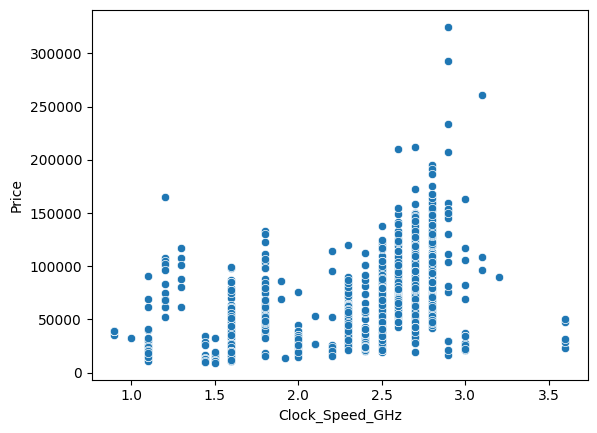

In [1458]:
sns.scatterplot(x='Clock_Speed_GHz',y='Price',data=dataset)

# Transformation on the Ram column 

In [1459]:
# Remove the word 'GB' from the Ram column
dataset['Ram']=dataset['Ram'].str.replace('GB',"").astype('int32')

<Axes: xlabel='Ram', ylabel='Price'>

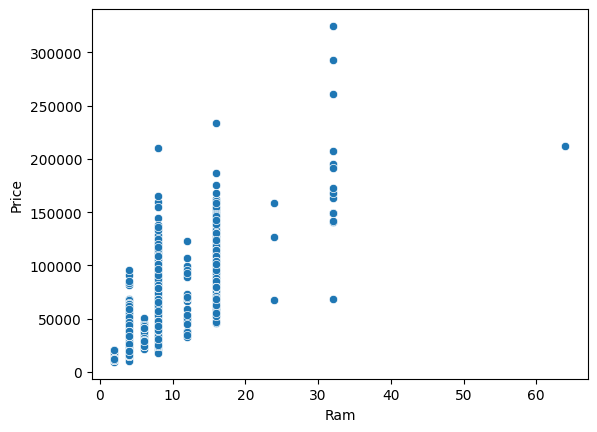

In [1460]:
sns.scatterplot(x='Ram',y='Price',data=dataset)

# Transformation on the Memory column

In [1461]:
# Give a close look at the memory column
dataset['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [1462]:
dataset['Memory'] = dataset['Memory'].astype(str).replace('\.0', '', regex=True)
dataset["Memory"] = dataset["Memory"].str.replace('GB', '')
dataset["Memory"] = dataset["Memory"].str.replace('TB', '000')
new = dataset["Memory"].str.split("+", n=1, expand=True)

dataset["first"] = new[0]
dataset["first"] = dataset["first"].str.strip()

dataset["second"] = new[1]

dataset["Layer1HDD"] = dataset["first"].apply(lambda x: 1 if "HDD" in x else 0)
dataset["Layer1SSD"] = dataset["first"].apply(lambda x: 1 if "SSD" in x else 0)
dataset["Layer1Hybrid"] = dataset["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
dataset["Layer1Flash_Storage"] = dataset["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

dataset['first'] = dataset['first'].str.replace(r'\D', '')

dataset["second"].fillna("0", inplace=True)

dataset["Layer2HDD"] = dataset["second"].apply(lambda x: 1 if "HDD" in x else 0)
dataset["Layer2SSD"] = dataset["second"].apply(lambda x: 1 if "SSD" in x else 0)
dataset["Layer2Hybrid"] = dataset["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
dataset["Layer2Flash_Storage"] = dataset["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

dataset['second'] = dataset['second'].str.replace(r'\D', '')

dataset["first"] = dataset["first"].astype(int)
dataset["second"] = dataset["second"].astype(int)

dataset["HDD"] = (dataset["first"] * dataset["Layer1HDD"] + dataset["second"] * dataset["Layer2HDD"])
dataset["SSD"] = (dataset["first"] * dataset["Layer1SSD"] + dataset["second"] * dataset["Layer2SSD"])
dataset["Hybrid"] = (dataset["first"] * dataset["Layer1Hybrid"] + dataset["second"] * dataset["Layer2Hybrid"])
dataset["Flash_Storage"] = (dataset["first"] * dataset["Layer1Flash_Storage"] + dataset["second"] * dataset["Layer2Flash_Storage"])

dataset.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
                      'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
                      'Layer2Flash_Storage'], inplace=True)



C:\Users\devan\AppData\Local\Temp\ipykernel_1472\3894157054.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['first'] = dataset['first'].str.replace(r'\D', '')
C:\Users\devan\AppData\Local\Temp\ipykernel_1472\3894157054.py:25: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['second'] = dataset['second'].str.replace(r'\D', '')


In [1463]:
dataset.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,...,Resolution_Type,PPI,ScreenResolution_Ratio,Cpu Name,Cpu brand,Clock_Speed_GHz,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,...,others,492872.180451,others,Intel Core i5,Intel Core i5,2.3,0,128,0,0
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,...,others,155977.443609,others,Intel Core i5,Intel Core i5,1.8,0,0,0,128
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,...,Full HD,236376.923077,1920x1080,Intel Core i5,Intel Core i5,2.5,0,256,0,0
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,...,others,538714.285714,others,Intel Core i7,Intel Core i7,2.7,0,512,0,0
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,...,others,492872.180451,others,Intel Core i5,Intel Core i5,3.1,0,256,0,0


In [1464]:
dataset.corr()['Price']

C:\Users\devan\AppData\Local\Temp\ipykernel_1472\3781812157.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()['Price']


Ram                0.743007
Price              1.000000
Touchscreen        0.191226
Ips                0.252208
PPI                0.480376
Clock_Speed_GHz    0.430293
HDD               -0.096441
SSD                0.670799
Hybrid             0.007989
Flash_Storage     -0.040511
Name: Price, dtype: float64

# Transformation on the GPU column

In [1465]:
dataset['Gpu_Brand']=dataset['Gpu'].str.split().str[0]

<Axes: xlabel='Gpu_Brand', ylabel='Price'>

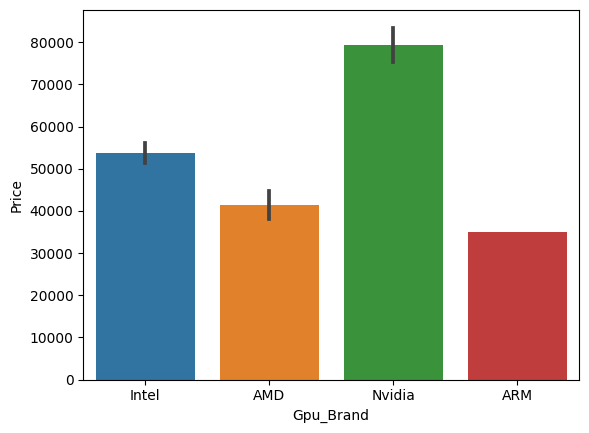

In [1466]:
# Gpu brand VS Price
sns.barplot(x='Gpu_Brand',y='Price',data=dataset)

In [1467]:
dataset['Gpu_Brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu_Brand, dtype: int64

In [1468]:
# Leave the row which has processor ARM
dataset=dataset[dataset['Gpu_Brand']!='ARM']

# Transformation on the OpSys column

In [1469]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [1470]:
dataset['os'] = dataset['OpSys'].apply(cat_os)

In [1471]:
dataset.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,...,ScreenResolution_Ratio,Cpu Name,Cpu brand,Clock_Speed_GHz,HDD,SSD,Hybrid,Flash_Storage,Gpu_Brand,os
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,...,others,Intel Core i5,Intel Core i5,2.3,0,128,0,0,Intel,Mac
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,...,others,Intel Core i5,Intel Core i5,1.8,0,0,0,128,Intel,Mac
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,...,1920x1080,Intel Core i5,Intel Core i5,2.5,0,256,0,0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,...,others,Intel Core i7,Intel Core i7,2.7,0,512,0,0,AMD,Mac
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,...,others,Intel Core i5,Intel Core i5,3.1,0,256,0,0,Intel,Mac


In [1472]:
dataset['os'].value_counts()

Windows               1125
Others/No OS/Linux     156
Mac                     21
Name: os, dtype: int64

<Axes: xlabel='os', ylabel='Price'>

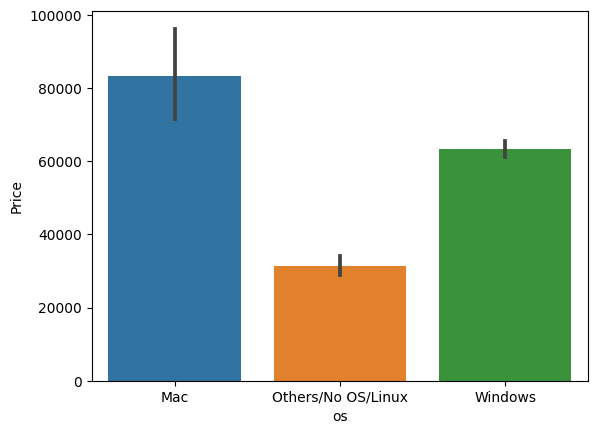

In [1473]:
sns.barplot(x='os',y='Price',data=dataset)

# Transformation on the weight column

In [1474]:
dataset['Weight']=dataset['Weight'].str.replace('kg',"")

In [1475]:
dataset['Weight']=dataset['Weight'].astype('float32')

<Axes: xlabel='Weight', ylabel='Price'>

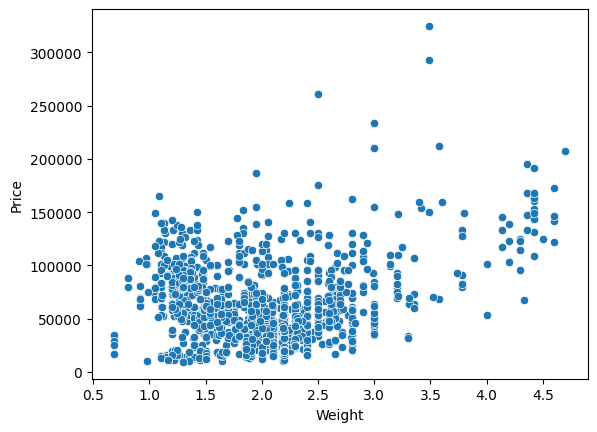

In [1476]:
sns.scatterplot(x='Weight',y='Price',data=dataset)

# Transformation at the price column

C:\Users\devan\AppData\Local\Temp\ipykernel_1472\983781003.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Price'])


<Axes: xlabel='Price', ylabel='Density'>

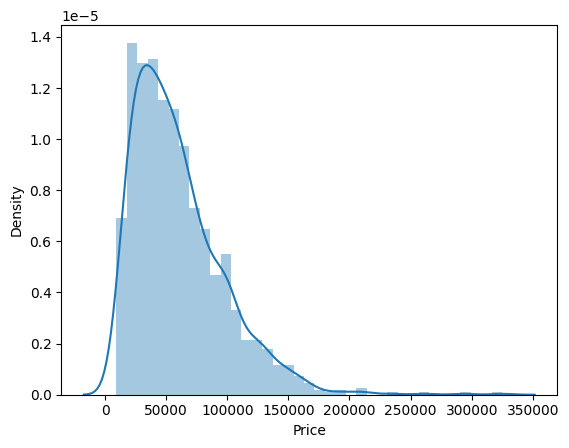

In [1477]:
sns.distplot(dataset['Price'])

C:\Users\devan\AppData\Local\Temp\ipykernel_1472\3456442459.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(dataset['Price']))


<Axes: xlabel='Price', ylabel='Density'>

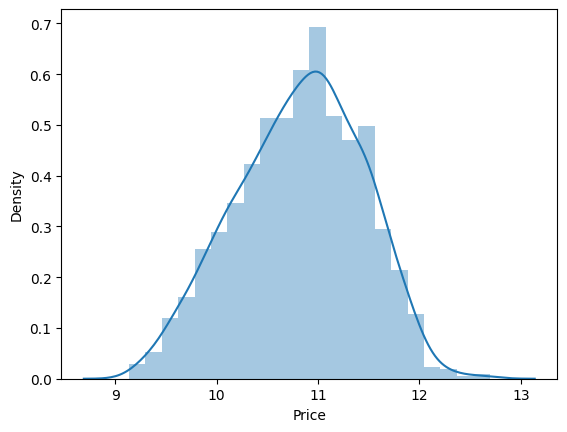

In [1478]:
# Use log for best curve
sns.distplot(np.log(dataset['Price']))

# Drop all the unwanted columns

In [1479]:
dataset.columns

Index(['Company', 'TypeName', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price', 'Touchscreen', 'Ips', 'Resolution_Type', 'PPI',
       'ScreenResolution_Ratio', 'Cpu Name', 'Cpu brand', 'Clock_Speed_GHz',
       'HDD', 'SSD', 'Hybrid', 'Flash_Storage', 'Gpu_Brand', 'os'],
      dtype='object')

In [1480]:
dataset.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,...,ScreenResolution_Ratio,Cpu Name,Cpu brand,Clock_Speed_GHz,HDD,SSD,Hybrid,Flash_Storage,Gpu_Brand,os
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,...,others,Intel Core i5,Intel Core i5,2.3,0,128,0,0,Intel,Mac
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,...,others,Intel Core i5,Intel Core i5,1.8,0,0,0,128,Intel,Mac
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,...,1920x1080,Intel Core i5,Intel Core i5,2.5,0,256,0,0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,...,others,Intel Core i7,Intel Core i7,2.7,0,512,0,0,AMD,Mac
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,...,others,Intel Core i5,Intel Core i5,3.1,0,256,0,0,Intel,Mac


In [1481]:
dataset.drop(columns=['Cpu','Gpu','Memory','OpSys','Hybrid','Flash_Storage','Cpu Name'],inplace=True)

In [1482]:
dataset.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,Resolution_Type,PPI,ScreenResolution_Ratio,Cpu brand,Clock_Speed_GHz,HDD,SSD,Gpu_Brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,others,492872.180451,others,Intel Core i5,2.3,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,others,155977.443609,others,Intel Core i5,1.8,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,Full HD,236376.923077,1920x1080,Intel Core i5,2.5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,others,538714.285714,others,Intel Core i7,2.7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,others,492872.180451,others,Intel Core i5,3.1,0,256,Intel,Mac


In [1483]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Company                 1302 non-null   object 
 1   TypeName                1302 non-null   object 
 2   Ram                     1302 non-null   int32  
 3   Weight                  1302 non-null   float32
 4   Price                   1302 non-null   float64
 5   Touchscreen             1302 non-null   int64  
 6   Ips                     1302 non-null   int64  
 7   Resolution_Type         1302 non-null   object 
 8   PPI                     1302 non-null   float64
 9   ScreenResolution_Ratio  1302 non-null   object 
 10  Cpu brand               1302 non-null   object 
 11  Clock_Speed_GHz         1302 non-null   float64
 12  HDD                     1302 non-null   int64  
 13  SSD                     1302 non-null   int64  
 14  Gpu_Brand               1302 non-null   

# Make independent and dependent columns

In [1484]:
X=dataset.drop(columns=['Price'])
y=np.log(dataset['Price']).values

In [1485]:
X

,Company,TypeName,Ram,Weight,Touchscreen,Ips,Resolution_Type,PPI,ScreenResolution_Ratio,Cpu brand,Clock_Speed_GHz,HDD,SSD,Gpu_Brand,os
0,Apple,Ultrabook,8,1.37,0,1,others,492872.180451,others,Intel Core i5,2.3,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,others,155977.443609,others,Intel Core i5,1.8,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,Full HD,236376.923077,1920x1080,Intel Core i5,2.5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,others,538714.285714,others,Intel Core i7,2.7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,others,492872.180451,others,Intel Core i5,3.1,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,Full HD,263391.428571,1920x1080,Intel Core i7,2.5,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,Quad HD+,770060.150376,3200x1800,Intel Core i7,2.5,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,others,133337.428571,1366x768,Other Intel Processor,1.6,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,others,119661.794872,1366x768,Intel Core i7,2.5,1000,0,AMD,Windows


# Split the data into train and test

In [1486]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [1487]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [1488]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Encode the categorical columns

In [1489]:
ohe=OneHotEncoder()
ohe.fit(X[['ScreenResolution_Ratio','Cpu brand']])

OneHotEncoder()

In [1490]:
oe=OrdinalEncoder()
oe.fit(X[['Company','TypeName','Resolution_Type','Gpu_Brand','os']])

OrdinalEncoder()

In [1491]:
ohe.categories_

[array(['1366x768', '1920x1080', '2560x1440', '3200x1800', '3840x2160',
        'others'], dtype=object),
 array(['AMD Processor', 'Intel Core i3', 'Intel Core i5', 'Intel Core i7',
        'Other Intel Processor'], dtype=object)]

In [1492]:
oe.categories_[0]=np.array(['Acer','Lenovo','HP','Asus','Dell','Toshiba','others','Apple','MSI'])
oe.categories_[1]=np.array(['Netbook','Notebook','2 in 1 Convertible','Ultrabook','Gaming','Workstation'])
oe.categories_[2]=np.array(['others','Full HD','Quad HD+','4K Ultra HD'])
oe.categories_[3]=np.array(['AMD','Intel','Nvidia'])
oe.categories_[4]=np.array(['Others/No OS/Linux','Windows','Mac'])

In [1493]:
oe.categories_

[array(['Acer', 'Lenovo', 'HP', 'Asus', 'Dell', 'Toshiba', 'others',
        'Apple', 'MSI'], dtype='<U7'),
 array(['Netbook', 'Notebook', '2 in 1 Convertible', 'Ultrabook', 'Gaming',
        'Workstation'], dtype='<U18'),
 array(['others', 'Full HD', 'Quad HD+', '4K Ultra HD'], dtype='<U11'),
 array(['AMD', 'Intel', 'Nvidia'], dtype='<U6'),
 array(['Others/No OS/Linux', 'Windows', 'Mac'], dtype='<U18')]

In [1494]:
ct=ColumnTransformer(transformers=[
    ('oe',OrdinalEncoder(categories=oe.categories_),['Company','TypeName','Resolution_Type','Gpu_Brand','os']),
    ('ohe',OneHotEncoder(categories=ohe.categories_,drop='first',sparse=False),['ScreenResolution_Ratio','Cpu brand'])
],remainder='passthrough')

In [1495]:
X_train=ct.fit_transform(X_train)

C:\Users\devan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Linear Regression

In [1496]:
linear_regressor=LinearRegression()
linear_regressor.fit(X_train,y_train)
y_pred=linear_regressor.predict(ct.transform(X_test))
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.8115072152174583
0.20555732471568766


# Decision Tree

In [1497]:
decision_tree_regressor=DecisionTreeRegressor()
decision_tree_regressor.fit(X_train,y_train)
y_pred=decision_tree_regressor.predict(ct.transform(X_test))
print(r2_score(y_test,y_pred)) 
print(mean_absolute_error(y_test,y_pred))

0.8598901413228451
0.16913766500245098


# SVR

In [1499]:
svr_regressor=SVR(kernel='rbf',C=10000,epsilon=0.1)
svr_regressor.fit(X_train,y_train)
y_pred=svr_regressor.predict(ct.transform(X_test))
print(r2_score(y_test,y_pred)) 
print(mean_absolute_error(y_test,y_pred))

0.5575627806469436
0.3216556875857218


# Random Forest

In [1501]:
random_forest_regressor=RandomForestRegressor(n_estimators=100,random_state=2)
random_forest_regressor.fit(X_train,y_train)
y_pred=random_forest_regressor.predict(ct.transform(X_test))
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.9009027582963535
0.14454059668792998


# Voting Regressor

In [1502]:
from sklearn.ensemble import VotingRegressor

In [1503]:
regressor1 = LinearRegression()
regressor2 = DecisionTreeRegressor()
regressor3 = RandomForestRegressor(n_estimators=100)

In [1504]:
voting_regressor = VotingRegressor(estimators=[('lr', regressor1), ('dt', regressor2), ('rf', regressor3)])

In [1505]:
voting_regressor.fit(X_train, y_train)
y_pred = voting_regressor.predict(ct.transform(X_test))
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.897502590508583
0.1484323456654144


# Save the model (Random Forest)

In [1508]:
import joblib

In [1509]:
# Save the trained model to a file
model_filename = 'Laptop_Price_Predictor_random_forest.joblib'
joblib.dump(random_forest_regressor, model_filename)

['Laptop_Price_Predictor_random_forest.joblib']